In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np

In [2]:
prom_file_path = "../r11n14_tb.parquet"

In [3]:
prom_df = pd.read_parquet(prom_file_path)

In [5]:
prom_df.fillna(0, inplace=True)
kmeans = KMeans(n_clusters=2)
feature_cols = [col for col in prom_df.columns if col not in ['node', 'timestamp', 'isAnomaly','node_netstat_Udp_InErrors','node_netstat_Tcp_InErrs','node_netstat_Icmp_InErrors','node_filesystem_device_error-sum','jobID','__index_level_0__']]
kmeans.fit(prom_df[feature_cols])

pred = kmeans.predict(prom_df[feature_cols])

distances = kmeans.transform(prom_df[feature_cols])

dist_to_center = [distances[i, pred[i]] for i in range(len(pred))]

mean_dist = np.mean(dist_to_center)
pred_labels = [1 if dist > mean_dist else 0 for dist in dist_to_center]

/home/wenjun/miniconda3/envs/python_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     24560
           1       0.80      0.50      0.61     12286

    accuracy                           0.79     36846
   macro avg       0.80      0.72      0.74     36846
weighted avg       0.79      0.79      0.78     36846

Confusion matrix:
 [[23076  1484]
 [ 6176  6110]]
ROC AUC Score: 0.7184452815921939


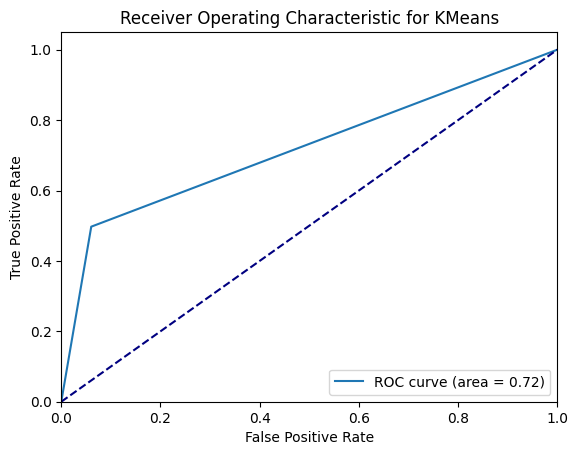

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


print(classification_report(prom_df['isAnomaly'], pred_labels))

conf_mat = confusion_matrix(prom_df['isAnomaly'], pred_labels)
print('Confusion matrix:\n', conf_mat)

roc_auc = roc_auc_score(prom_df['isAnomaly'], pred_labels)
print('ROC AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(prom_df['isAnomaly'], pred_labels)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KMeans')
plt.legend(loc="lower right")

plt.savefig('kmeans_roc_curve_r27n19.pdf', format='pdf')

plt.show()


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     24560
           1       0.80      0.50      0.61     12286

    accuracy                           0.79     36846
   macro avg       0.80      0.72      0.74     36846
weighted avg       0.79      0.79      0.78     36846

Confusion matrix:
 [[23076  1484]
 [ 6176  6110]]
ROC AUC Score: 0.7184452815921939


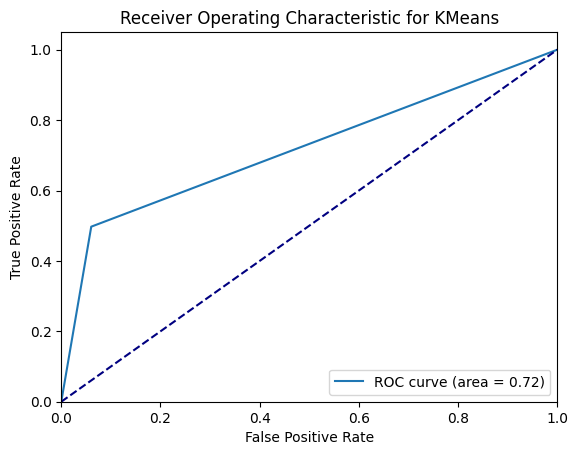

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


print(classification_report(prom_df['isAnomaly'], pred_labels))

conf_mat = confusion_matrix(prom_df['isAnomaly'], pred_labels)
print('Confusion matrix:\n', conf_mat)

roc_auc = roc_auc_score(prom_df['isAnomaly'], pred_labels)
print('ROC AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(prom_df['isAnomaly'], pred_labels)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KMeans')
plt.legend(loc="lower right")


plt.show()


In [8]:
import joblib
model_filename = 'r14n17_kmeans_model.joblib'
joblib.dump(kmeans, model_filename)

['r14n17_kmeans_model.joblib']